In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [2]:
df = pd.read_csv('preprocess.csv')
df = df.astype('float16')

In [3]:
X = df.loc[:, df.columns != 'prob']
y = df['prob']

In [4]:
y_one = pd.get_dummies(y)
y_one

,0.0,1.0,2.0,3.0,4.0
0,1,0,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1157,1,0,0,0,0
1158,1,0,0,0,0
1159,1,0,0,0,0
1160,1,0,0,0,0


## Original Data ##

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one, test_size=0.3, shuffle=True)

In [6]:
model = tf.keras.Sequential()
model.add(Dense(1024, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              31744     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8

In [7]:
history = model.fit(X_train, y_train, batch_size=20, epochs=100, verbose=2, validation_data=(X_test,y_test))

Epoch 1/100
41/41 - 2s - loss: 1.7721 - categorical_accuracy: 0.4613 - val_loss: 1.3675 - val_categorical_accuracy: 0.5845
Epoch 2/100
41/41 - 0s - loss: 1.1896 - categorical_accuracy: 0.6076 - val_loss: 1.3254 - val_categorical_accuracy: 0.5845
Epoch 3/100
41/41 - 0s - loss: 1.1024 - categorical_accuracy: 0.6039 - val_loss: 1.1834 - val_categorical_accuracy: 0.5731
Epoch 4/100
41/41 - 0s - loss: 1.0384 - categorical_accuracy: 0.6101 - val_loss: 1.1475 - val_categorical_accuracy: 0.5845
Epoch 5/100
41/41 - 0s - loss: 1.0040 - categorical_accuracy: 0.6224 - val_loss: 1.0578 - val_categorical_accuracy: 0.6189
Epoch 6/100
41/41 - 0s - loss: 0.9734 - categorical_accuracy: 0.6064 - val_loss: 1.1146 - val_categorical_accuracy: 0.5989
Epoch 7/100
41/41 - 0s - loss: 0.9697 - categorical_accuracy: 0.6224 - val_loss: 1.0192 - val_categorical_accuracy: 0.5874
Epoch 8/100
41/41 - 0s - loss: 0.9784 - categorical_accuracy: 0.6261 - val_loss: 1.0881 - val_categorical_accuracy: 0.5845
Epoch 9/100
41/4

Epoch 68/100
41/41 - 0s - loss: 0.7315 - categorical_accuracy: 0.6962 - val_loss: 0.9161 - val_categorical_accuracy: 0.6648
Epoch 69/100
41/41 - 0s - loss: 0.7084 - categorical_accuracy: 0.6999 - val_loss: 0.9240 - val_categorical_accuracy: 0.6218
Epoch 70/100
41/41 - 0s - loss: 0.7442 - categorical_accuracy: 0.6740 - val_loss: 0.9841 - val_categorical_accuracy: 0.6590
Epoch 71/100
41/41 - 0s - loss: 0.7594 - categorical_accuracy: 0.6654 - val_loss: 0.8898 - val_categorical_accuracy: 0.6533
Epoch 72/100
41/41 - 0s - loss: 0.7114 - categorical_accuracy: 0.6900 - val_loss: 0.8955 - val_categorical_accuracy: 0.6476
Epoch 73/100
41/41 - 0s - loss: 0.7544 - categorical_accuracy: 0.7097 - val_loss: 0.9182 - val_categorical_accuracy: 0.6476
Epoch 74/100
41/41 - 0s - loss: 0.7835 - categorical_accuracy: 0.6863 - val_loss: 0.8544 - val_categorical_accuracy: 0.6619
Epoch 75/100
41/41 - 0s - loss: 0.6629 - categorical_accuracy: 0.7171 - val_loss: 0.9184 - val_categorical_accuracy: 0.6648
Epoch 76

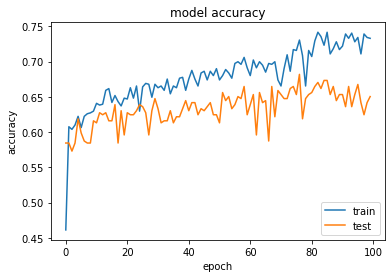

In [8]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## Values Scaled ##

In [9]:
scaled_values = StandardScaler().fit_transform(X)
X2 = pd.DataFrame(scaled_values, columns = X.columns)
X2

,age,sex,presure_blood_resting,colesterol,cigarettes_per_day,smoker_years,sugar,max_heart_rate,res_heart_rate,blood_presure_sistoles,...,major_vessels_1.0,major_vessels_2.0,major_vessels_3.0,electrocardio_0.0,electrocardio_1.0,electrocardio_2.0,chest_pain_1.0,chest_pain_2.0,chest_pain_3.0,chest_pain_4.0
0,1.169922,0.776367,0.869629,-0.219482,2.275391,0.017792,2.548828,0.318359,-1.271484,0.904297,...,-0.339355,-0.253174,-0.186401,-0.964355,-0.345703,1.675781,4.246094,-0.455811,-0.518066,-0.843262
1,1.625000,0.776367,1.837891,0.928711,1.586914,1.483398,-0.392334,-1.568359,-0.958984,-0.435303,...,-0.339355,-0.253174,5.367188,-0.964355,-0.345703,1.675781,-0.235352,-0.455811,-0.518066,1.185547
2,1.625000,0.776367,-0.744629,-0.306152,0.213745,1.117188,-0.392334,-0.625488,0.137817,-1.328125,...,-0.339355,3.949219,-0.186401,-0.964355,-0.345703,1.675781,-0.235352,-0.455811,-0.518066,1.185547
3,-1.789062,0.776367,-0.098877,0.148804,-1.160156,-1.447266,-0.392334,1.981445,0.607910,1.127930,...,-0.339355,-0.253174,-0.186401,1.037109,-0.345703,-0.596680,-0.235352,-0.455811,1.929688,-0.843262
4,-1.333008,-1.288086,-0.098877,-0.847656,-1.160156,-1.447266,-0.392334,1.307617,-0.410645,-0.435303,...,-0.339355,-0.253174,-0.186401,-0.964355,-0.345703,1.675781,-0.235352,2.193359,-0.518066,-0.843262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,-0.422852,-1.288086,-0.228027,-0.235718,-0.404297,0.750488,-0.392334,0.003929,0.186768,-0.524902,...,-0.339355,-0.253174,-0.186401,-0.964355,-0.345703,-0.596680,-0.235352,-0.455811,-0.518066,-0.843262
1158,-0.422852,-1.288086,-0.228027,-0.235718,-0.404297,0.750488,-0.392334,0.003929,0.186768,-0.524902,...,-0.339355,-0.253174,-0.186401,-0.964355,-0.345703,-0.596680,-0.235352,-0.455811,-0.518066,-0.843262
1159,-0.422852,-1.288086,-0.228027,-0.235718,-0.404297,0.750488,-0.392334,0.003929,0.186768,-0.524902,...,-0.339355,-0.253174,-0.186401,-0.964355,-0.345703,-0.596680,-0.235352,-0.455811,-0.518066,-0.843262
1160,-0.422852,-1.288086,-0.228027,-0.235718,-0.404297,0.750488,-0.392334,0.003929,0.186768,-0.524902,...,-0.339355,-0.253174,-0.186401,-0.964355,-0.345703,-0.596680,-0.235352,-0.455811,-0.518066,-0.843262


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X2, y_one, test_size=0.3, shuffle=True)

In [11]:
modelS = tf.keras.Sequential()
modelS.add(Dense(1024, input_shape=(X.shape[1],), activation='relu'))
modelS.add(Dense(1024, activation='relu'))
modelS.add(Dense(512, activation='relu'))
modelS.add(Dense(512, activation='relu'))
modelS.add(Dense(256, activation='relu'))
modelS.add(Dense(128, activation='relu'))
modelS.add(Dense(64, activation='relu'))
modelS.add(Dense(32, activation='relu'))
modelS.add(Dense(16, activation='relu'))
modelS.add(Dense(5, activation='softmax'))
modelS.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.CategoricalAccuracy()])
modelS.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              31744     
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

In [12]:
history = modelS.fit(X_train, y_train, batch_size=20, epochs=100, verbose=2, validation_data=(X_test,y_test))

Epoch 1/100
41/41 - 1s - loss: 0.9624 - categorical_accuracy: 0.6248 - val_loss: 0.8886 - val_categorical_accuracy: 0.6246
Epoch 2/100
41/41 - 0s - loss: 0.8253 - categorical_accuracy: 0.6593 - val_loss: 0.8771 - val_categorical_accuracy: 0.6332
Epoch 3/100
41/41 - 0s - loss: 0.7706 - categorical_accuracy: 0.6753 - val_loss: 0.8089 - val_categorical_accuracy: 0.6447
Epoch 4/100
41/41 - 0s - loss: 0.7395 - categorical_accuracy: 0.6777 - val_loss: 0.8210 - val_categorical_accuracy: 0.6361
Epoch 5/100
41/41 - 0s - loss: 0.7495 - categorical_accuracy: 0.6679 - val_loss: 0.7979 - val_categorical_accuracy: 0.6476
Epoch 6/100
41/41 - 0s - loss: 0.6781 - categorical_accuracy: 0.7023 - val_loss: 0.7682 - val_categorical_accuracy: 0.6533
Epoch 7/100
41/41 - 0s - loss: 0.6238 - categorical_accuracy: 0.7023 - val_loss: 0.8028 - val_categorical_accuracy: 0.6619
Epoch 8/100
41/41 - 0s - loss: 0.5908 - categorical_accuracy: 0.7306 - val_loss: 0.8726 - val_categorical_accuracy: 0.6533
Epoch 9/100
41/4

Epoch 67/100
41/41 - 0s - loss: 6.0541e-06 - categorical_accuracy: 1.0000 - val_loss: 4.2744 - val_categorical_accuracy: 0.7736
Epoch 68/100
41/41 - 0s - loss: 5.0540e-06 - categorical_accuracy: 1.0000 - val_loss: 4.3385 - val_categorical_accuracy: 0.7736
Epoch 69/100
41/41 - 0s - loss: 4.3688e-06 - categorical_accuracy: 1.0000 - val_loss: 4.4138 - val_categorical_accuracy: 0.7736
Epoch 70/100
41/41 - 0s - loss: 3.8030e-06 - categorical_accuracy: 1.0000 - val_loss: 4.4634 - val_categorical_accuracy: 0.7736
Epoch 71/100
41/41 - 0s - loss: 3.3609e-06 - categorical_accuracy: 1.0000 - val_loss: 4.5209 - val_categorical_accuracy: 0.7736
Epoch 72/100
41/41 - 0s - loss: 2.9927e-06 - categorical_accuracy: 1.0000 - val_loss: 4.5740 - val_categorical_accuracy: 0.7736
Epoch 73/100
41/41 - 0s - loss: 2.6720e-06 - categorical_accuracy: 1.0000 - val_loss: 4.6138 - val_categorical_accuracy: 0.7736
Epoch 74/100
41/41 - 0s - loss: 2.4088e-06 - categorical_accuracy: 1.0000 - val_loss: 4.6610 - val_categ

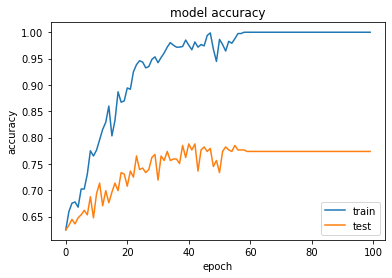

In [13]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## Values Scaled and PCA applied ##

In [14]:
n_components = 5
pca = decomposition.PCA(n_components=n_components)
pca.fit(X2)


eigenvalues = sorted(list(pca.explained_variance_ratio_), reverse=True)
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = X.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]


X_pca = pd.DataFrame(pca.transform(X2), columns=most_important_names)
X_pca

,chest_pain_4.0,thal_3.0,blood_presure_sistoles,electrocardio_0.0,smoker_years
0,1.895551,1.388427,3.747835,-0.721267,1.926403
1,3.939414,0.773120,0.139941,-0.947331,2.018335
2,3.984703,1.275528,-2.019383,0.258084,1.373278
3,-1.476230,2.596068,1.371520,0.924802,-1.816698
4,-3.008415,2.959077,-0.475680,-1.107471,-0.984729
...,...,...,...,...,...
1157,-1.291661,-1.554530,-1.413364,-1.060433,0.386577
1158,-1.291661,-1.554530,-1.413364,-1.060433,0.386577
1159,-1.291661,-1.554530,-1.413364,-1.060433,0.386577
1160,-1.291661,-1.554530,-1.413364,-1.060433,0.386577


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_one, test_size=0.3, shuffle=True)

In [16]:
modelSP = tf.keras.Sequential()
modelSP.add(Dense(1024, input_shape=(X_pca.shape[1],), activation='relu'))
modelSP.add(Dense(1024, activation='relu'))
modelSP.add(Dense(512, activation='relu'))
modelSP.add(Dense(512, activation='relu'))
modelSP.add(Dense(256, activation='relu'))
modelSP.add(Dense(128, activation='relu'))
modelSP.add(Dense(64, activation='relu'))
modelSP.add(Dense(32, activation='relu'))
modelSP.add(Dense(16, activation='relu'))
modelSP.add(Dense(5, activation='softmax'))
modelSP.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.CategoricalAccuracy()])
modelSP.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1024)              6144      
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_26 (Dense)             (None, 64)               

In [17]:
history = modelSP.fit(X_train, y_train, batch_size=20, epochs=200, verbose=2, validation_data=(X_test,y_test))

Epoch 1/200
41/41 - 1s - loss: 0.9510 - categorical_accuracy: 0.6089 - val_loss: 1.0198 - val_categorical_accuracy: 0.6103
Epoch 2/200
41/41 - 0s - loss: 0.8499 - categorical_accuracy: 0.6482 - val_loss: 0.9085 - val_categorical_accuracy: 0.5989
Epoch 3/200
41/41 - 0s - loss: 0.8491 - categorical_accuracy: 0.6605 - val_loss: 0.8943 - val_categorical_accuracy: 0.6160
Epoch 4/200
41/41 - 0s - loss: 0.8106 - categorical_accuracy: 0.6654 - val_loss: 0.9467 - val_categorical_accuracy: 0.6246
Epoch 5/200
41/41 - 0s - loss: 0.8049 - categorical_accuracy: 0.6667 - val_loss: 0.8883 - val_categorical_accuracy: 0.6160
Epoch 6/200
41/41 - 0s - loss: 0.7783 - categorical_accuracy: 0.6765 - val_loss: 0.9946 - val_categorical_accuracy: 0.6046
Epoch 7/200
41/41 - 0s - loss: 0.7770 - categorical_accuracy: 0.6704 - val_loss: 0.9367 - val_categorical_accuracy: 0.6189
Epoch 8/200
41/41 - 0s - loss: 0.7680 - categorical_accuracy: 0.6728 - val_loss: 0.9015 - val_categorical_accuracy: 0.6160
Epoch 9/200
41/4

Epoch 68/200
41/41 - 0s - loss: 0.2647 - categorical_accuracy: 0.9004 - val_loss: 1.8996 - val_categorical_accuracy: 0.7364
Epoch 69/200
41/41 - 0s - loss: 0.2497 - categorical_accuracy: 0.9139 - val_loss: 1.9186 - val_categorical_accuracy: 0.7077
Epoch 70/200
41/41 - 0s - loss: 0.1807 - categorical_accuracy: 0.9299 - val_loss: 2.4589 - val_categorical_accuracy: 0.7221
Epoch 71/200
41/41 - 0s - loss: 0.1626 - categorical_accuracy: 0.9397 - val_loss: 2.7645 - val_categorical_accuracy: 0.7507
Epoch 72/200
41/41 - 0s - loss: 0.2030 - categorical_accuracy: 0.9274 - val_loss: 2.5131 - val_categorical_accuracy: 0.7106
Epoch 73/200
41/41 - 0s - loss: 0.2123 - categorical_accuracy: 0.9250 - val_loss: 2.7701 - val_categorical_accuracy: 0.7135
Epoch 74/200
41/41 - 0s - loss: 0.2365 - categorical_accuracy: 0.9139 - val_loss: 2.1899 - val_categorical_accuracy: 0.7364
Epoch 75/200
41/41 - 0s - loss: 0.2251 - categorical_accuracy: 0.9213 - val_loss: 1.9570 - val_categorical_accuracy: 0.7421
Epoch 76

Epoch 134/200
41/41 - 0s - loss: 0.0827 - categorical_accuracy: 0.9729 - val_loss: 2.6459 - val_categorical_accuracy: 0.7307
Epoch 135/200
41/41 - 0s - loss: 0.1715 - categorical_accuracy: 0.9446 - val_loss: 2.1065 - val_categorical_accuracy: 0.7135
Epoch 136/200
41/41 - 0s - loss: 0.2034 - categorical_accuracy: 0.9397 - val_loss: 1.8322 - val_categorical_accuracy: 0.7192
Epoch 137/200
41/41 - 0s - loss: 0.1485 - categorical_accuracy: 0.9496 - val_loss: 1.7591 - val_categorical_accuracy: 0.7163
Epoch 138/200
41/41 - 0s - loss: 0.1140 - categorical_accuracy: 0.9619 - val_loss: 2.0956 - val_categorical_accuracy: 0.7364
Epoch 139/200
41/41 - 0s - loss: 0.1306 - categorical_accuracy: 0.9606 - val_loss: 1.9919 - val_categorical_accuracy: 0.7450
Epoch 140/200
41/41 - 0s - loss: 0.1213 - categorical_accuracy: 0.9680 - val_loss: 2.0766 - val_categorical_accuracy: 0.7393
Epoch 141/200
41/41 - 0s - loss: 0.1409 - categorical_accuracy: 0.9569 - val_loss: 2.0715 - val_categorical_accuracy: 0.7479


Epoch 200/200
41/41 - 0s - loss: 0.0121 - categorical_accuracy: 0.9938 - val_loss: 3.3618 - val_categorical_accuracy: 0.7335


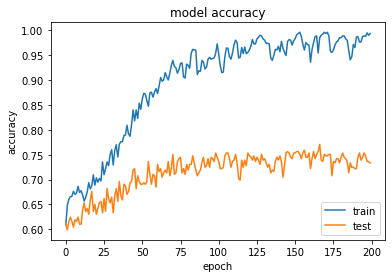

In [18]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()